In [1]:
import feather
import scanpy as sc
import numpy as np
import scanpy as sc
import pandas as pd
from anndata import AnnData


In [2]:
norm_cells_path = '/pylon5/mc5pijp/mkleyman/data/fiona_rhemac10/processed/full/scran_qc_cells_3.feather'
norm_annot_path = '/pylon5/mc5pijp/mkleyman/data/fiona_rhemac10/processed/full/scran_qc_annot_3.feather'


In [3]:
striatum_df =  feather.read_dataframe(norm_cells_path)
annot_df = feather.read_dataframe(norm_annot_path)

In [6]:
bin_df = striatum_df>0

In [12]:
bin_df.shape

(7054, 53573)

In [15]:
numGenes= np.sum(striatum_df,axis=1)

In [16]:
numGenes.shape

(7054,)

In [18]:
np.median(annot_df["nUMIs"])

35740.0

(array([  7.,  38., 227., 479., 564., 564., 606., 565., 544., 522., 518.,
        466., 424., 436., 363., 299., 239., 162.,  27.,   4.]),
 array([ 8204.606995  ,  8655.92685808,  9107.24672115,  9558.56658423,
        10009.8864473 , 10461.20631038, 10912.52617345, 11363.84603652,
        11815.1658996 , 12266.48576267, 12717.80562575, 13169.12548882,
        13620.4453519 , 14071.76521497, 14523.08507805, 14974.40494112,
        15425.7248042 , 15877.04466727, 16328.36453035, 16779.68439342,
        17231.0042565 ]),
 <a list of 20 Patch objects>)

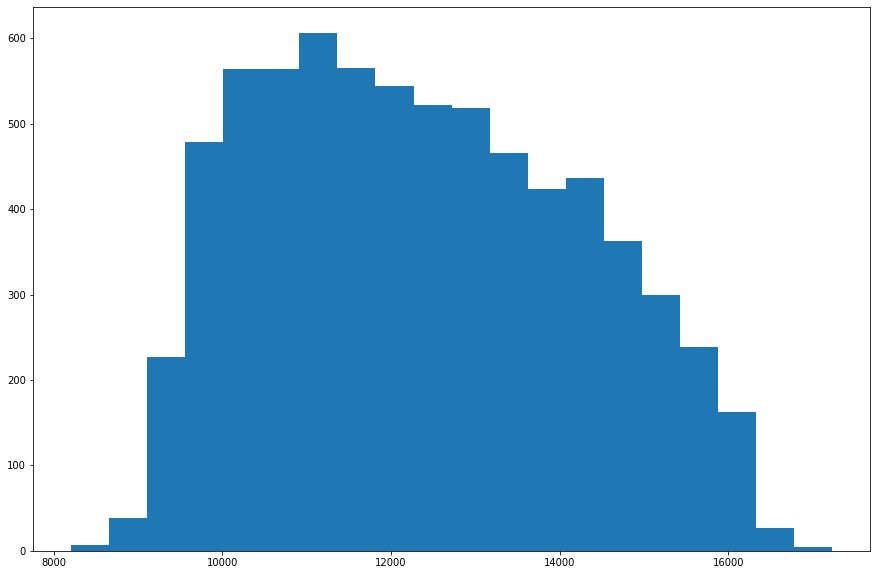

In [19]:
plt.hist(numGenes,bins=20)

In [4]:
striatum_ann = AnnData(striatum_df)

Transforming to str index.


In [5]:
striatum_ann.var_names = striatum_df.columns.values
striatum_ann.obs_names = annot_df["full_id"]

In [6]:
for col in annot_df.columns.values:
    striatum_ann.obs[col] = pd.Categorical(annot_df[col].values, categories=np.unique(annot_df[col].values))

In [7]:
striatum_ann.obs["doublet_score"] = pd.Series(annot_df["doublet_score"].values)
striatum_ann.obs["size_factor"] = pd.Series(annot_df["size_factor"].values.astype(float))

In [8]:
sc.pp.highly_variable_genes(striatum_ann, n_top_genes=8000)

In [9]:
sc.pp.pca(striatum_ann, n_comps=50, use_highly_variable=True, svd_solver='arpack')

sc.pp.neighbors(striatum_ann)

In [10]:
sc.tl.umap(striatum_ann)

In [11]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

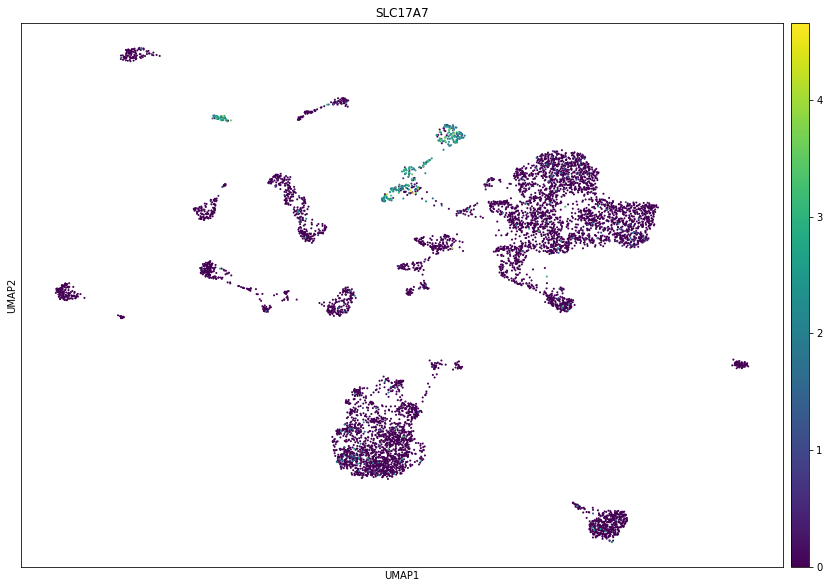

In [31]:
sc.pl.umap(striatum_ann,color="SLC17A7")

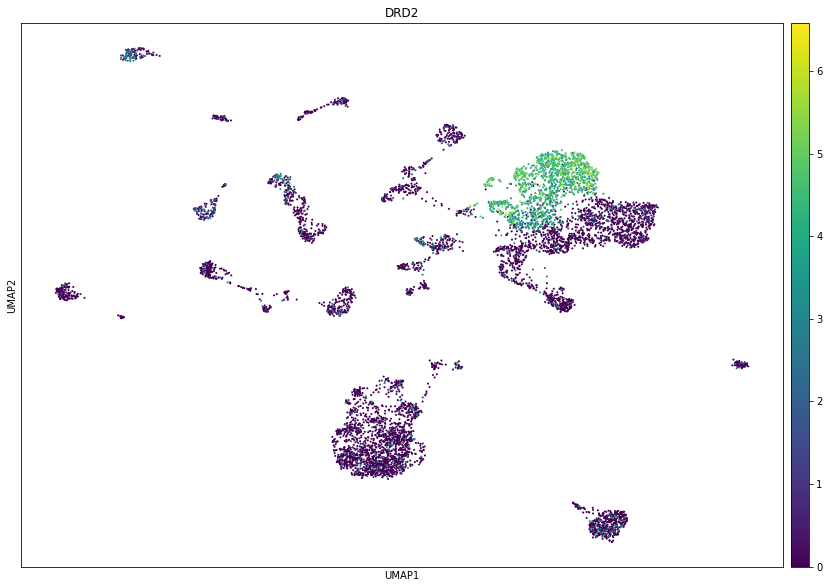

In [20]:
sc.pl.umap(striatum_ann,color="DRD2")

In [17]:
striatum_ann.X.shape

(7054, 53573)

In [18]:
sc.tl.leiden(striatum_ann,resolution=0.05)

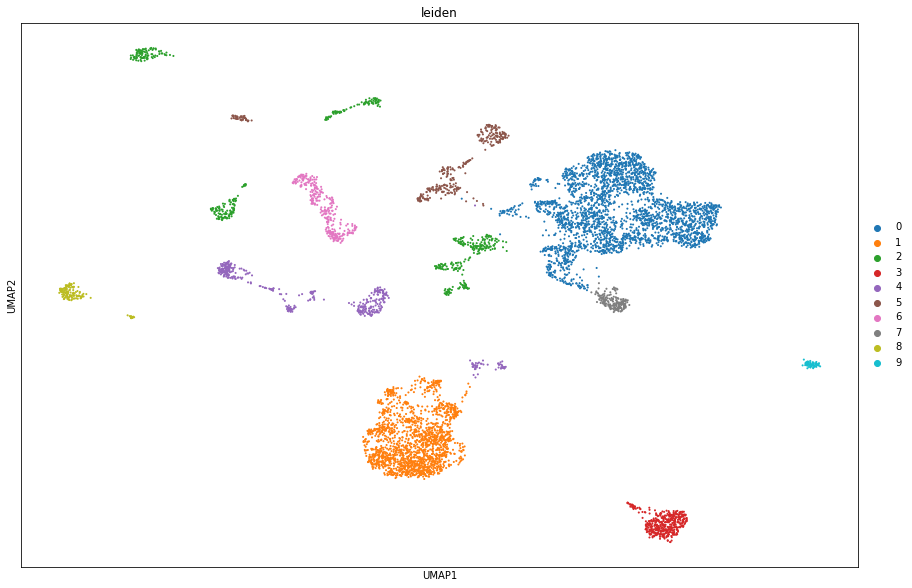

In [19]:
sc.pl.umap(striatum_ann,color="leiden")

In [13]:
from plotnine import ggplot,geom_point,aes

In [17]:
vis_dict = {'umap1': striatum_ann.obsm["X_umap"][:,0],"umap2":striatum_ann.obsm["X_umap"][:,1], "size_factor" : annot_df["size_factor"].values, "doublet_score":annot_df["doublet_score"].values,"cluster":striatum_ann.obs["leiden"].values}

In [ ]:
vis_df = pd.DataFrame(vis_dict)

In [ ]:
ggplot(vis_df,aes(x="umap1",y="umap2",color="cluster"))+geom_point()

In [21]:
is_msn = np.asarray([clust in ['0','6','7'] for clust in striatum_ann.obs["leiden"].values])

In [22]:
striatum_ann.obs["mark"] = pd.Categorical(
    values=is_msn,
    categories=[True, False])
sc.tl.rank_genes_groups(striatum_ann, "mark",method="wilcoxon", corr_method="bonferroni")
m_genes = [tup[0].lower().capitalize() for tup in striatum_ann.uns["rank_genes_groups"]["names"]]
marker_genes = m_genes[:100]

In [23]:
m_pvals = [tup[0] for tup in striatum_ann.uns["rank_genes_groups"]["logfoldchanges"]]
m_pvals[:100]

[3.8912346,
 3.9236898,
 4.288083,
 5.1625195,
 3.7535064,
 4.4277377,
 5.3207603,
 4.893484,
 5.9071503,
 2.6243706,
 4.837893,
 5.296814,
 4.175245,
 4.728956,
 4.665178,
 4.2297435,
 3.4269004,
 5.65818,
 6.0651,
 4.1006484,
 5.5329037,
 5.1039634,
 4.4445295,
 5.2762237,
 2.7628224,
 4.1722555,
 5.2677884,
 3.9418702,
 4.686059,
 4.7062078,
 4.3600507,
 4.604221,
 3.4284182,
 5.024372,
 5.5636935,
 5.1599984,
 3.6637895,
 4.640363,
 4.2020235,
 2.814128,
 4.8081393,
 3.5472968,
 4.197529,
 4.162022,
 3.979163,
 5.0118504,
 3.9160929,
 4.1711793,
 3.869302,
 3.8103318,
 4.6870337,
 3.766741,
 4.708049,
 4.0177803,
 4.8137345,
 4.2158074,
 4.249364,
 3.9601216,
 4.0303082,
 2.6803021,
 1.9420112,
 3.4394803,
 4.4915586,
 2.9335785,
 4.6620717,
 3.8046873,
 5.0554757,
 3.784354,
 4.911012,
 3.9583807,
 4.3047686,
 3.863256,
 3.7757576,
 3.7909725,
 3.3449483,
 4.072509,
 2.0604587,
 3.2317703,
 3.079978,
 3.6006815,
 3.7361603,
 3.7835221,
 3.411656,
 3.5170493,
 2.5489812,
 4.347214,

A1BG  A1BG-AS1  A1CF       A2M  A2M-AS1     A2ML1     A2MP1   A3GALT2  \
1      0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
4      0.0       0.0   0.0  0.000000      0.0  0.000000  2.174571  0.000000   
5      0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
6      0.0       0.0   0.0  0.000000      0.0  0.535393  0.000000  0.000000   
11     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
12     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
14     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
15     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
16     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
17     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
19     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
21     0.0       0.0   0.0  0.000000      0.0  0.000000  2.809209  2.148516   
24     0.0       0.0   0.0  0.000000      0.0  0.821322  1.341445  0.000000   
25     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
26     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
29     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
31     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
34     0.0       0.0   0.0  0.000000      0.0  0.000000  3.502942  0.000000   
37     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
40     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
41     0.0       0.0   0.0  0.000000      0.0  0.000000  2.154025  0.000000   
43     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
45     0.0       0.0   0.0  0.000000      0.0  0.000000  1.776684  0.000000   
47     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
48     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
49     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
55     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
56     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
58     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
59     0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
...    ...       ...   ...       ...      ...       ...       ...       ...   
7000   0.0       0.0   0.0  0.000000      0.0  0.000000  2.658004  0.000000   
7002   0.0       0.0   0.0  0.000000      0.0  0.000000  0.917209  0.000000   
7003   0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
7005   0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
7006   0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
7010   0.0       0.0   0.0  0.000000      0.0  2.030301  0.000000  0.000000   
7015   0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
7016   0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
7017   0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
7021   0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
7022   0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
7023   0.0       0.0   0.0  0.000000      0.0  0.000000  3.306953  0.000000   
7024   0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
7025   0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
7027   0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
7028   0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
7029   0.0       0.0   0.0  0.000000      0.0  0.000000  0.000000  0.000000   
7032   0.0       0.0   0.0  1.931893      0.0  0.000000  0.000000  0.000000   
7034   0.0       0.0   0.0  0.000000      0.0  0.000000 

In [25]:
msn_df = striatum_df.loc[is_msn,:]

In [308]:
msn_ann = AnnData(msn_df.loc[ngenes_msn>3400,:])

Transforming to str index.


In [309]:
sc.pp.highly_variable_genes(msn_ann,n_top_genes=5000)

In [314]:
sc.pp.pca(msn_ann, n_comps=35, use_highly_variable=True)
sc.pp.neighbors(msn_ann)

In [315]:
sc.tl.umap(msn_ann)

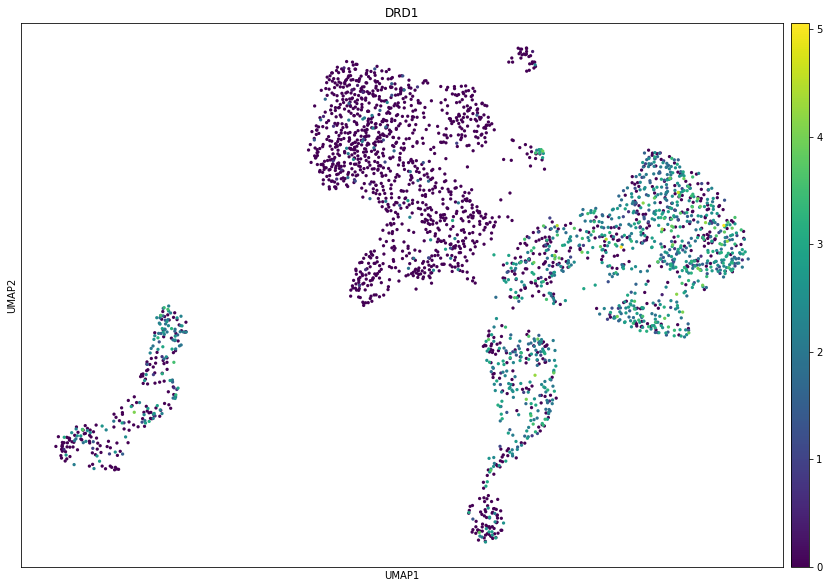

In [316]:
sc.pl.umap(msn_ann,color="DRD1")

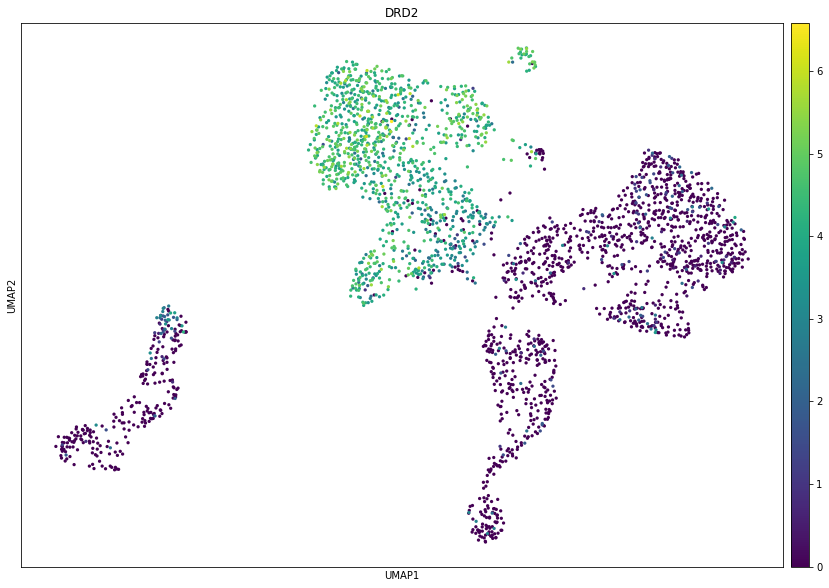

In [317]:
sc.pl.umap(msn_ann,color="DRD2")

In [370]:
sc.tl.leiden(msn_ann,resolution=0.1)

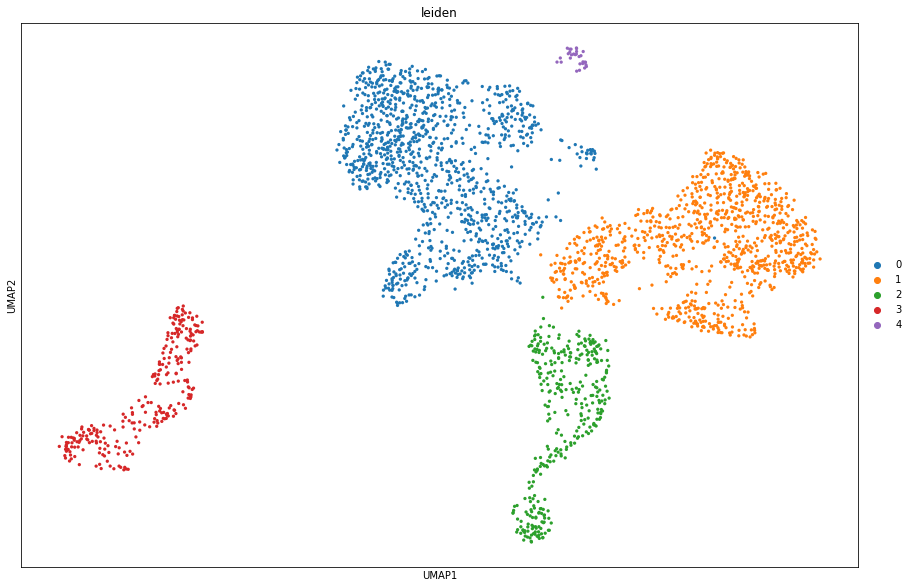

In [371]:
sc.pl.umap(msn_ann,color="leiden")

In [26]:
bin_msn = msn_df>0

In [27]:
ngenes_msn = np.sum(bin_msn,axis=1)

In [28]:
ngenes_msn.shape

(3284,)

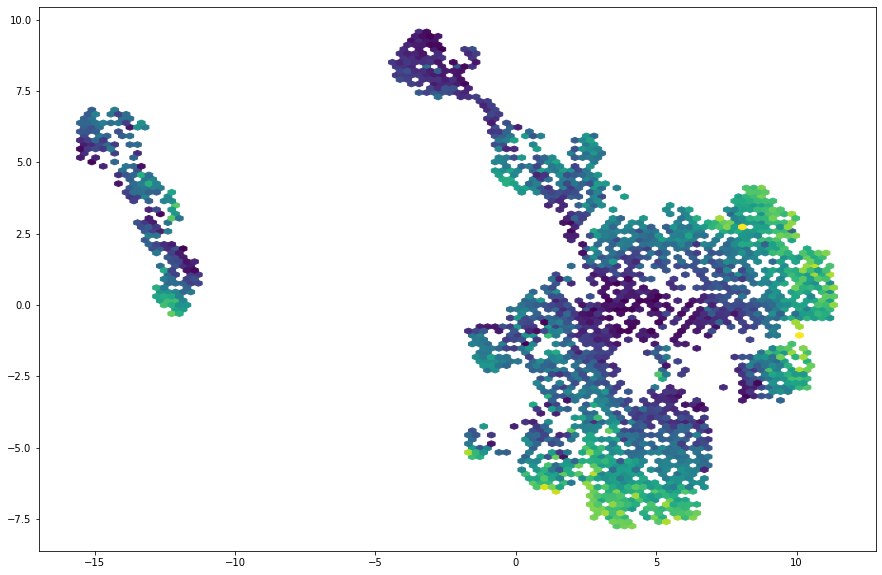

In [284]:
plt.hexbin(x=msn_ann.obsm["X_umap"][:,0],y=msn_ann.obsm["X_umap"][:,1],C=ngenes_msn,gridsize=100)

In [320]:
msn_ann.obs["region"] = pd.Categorical(annot_df["region"].values[is_msn][ngenes_msn>3400],np.unique(annot_df["region"].values[is_msn][ngenes_msn>3400]))

(array([366., 480., 455., 546., 507., 397., 268., 180.,  75.,  10.]),
 array([2501. , 3212.9, 3924.8, 4636.7, 5348.6, 6060.5, 6772.4, 7484.3,
        8196.2, 8908.1, 9620. ]),
 <a list of 10 Patch objects>)

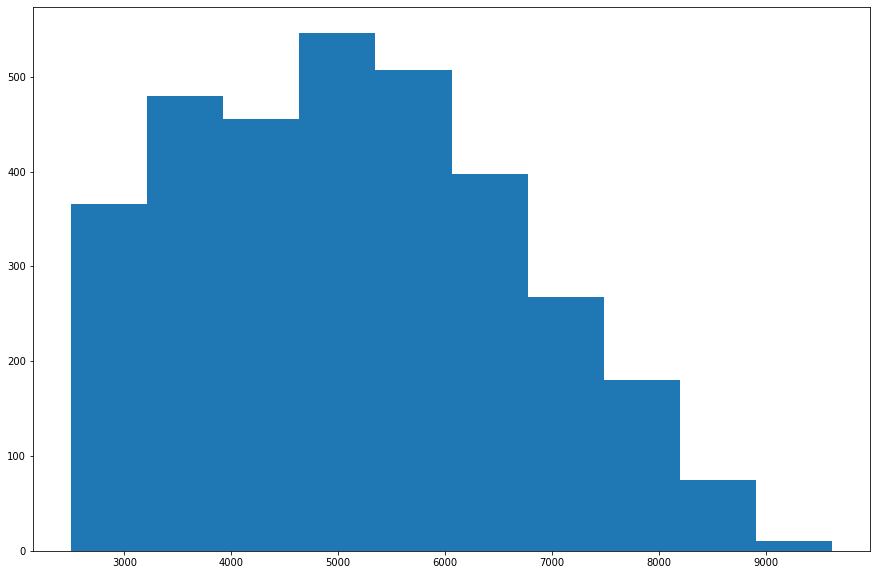

In [285]:
plt.hist(ngenes_msn)

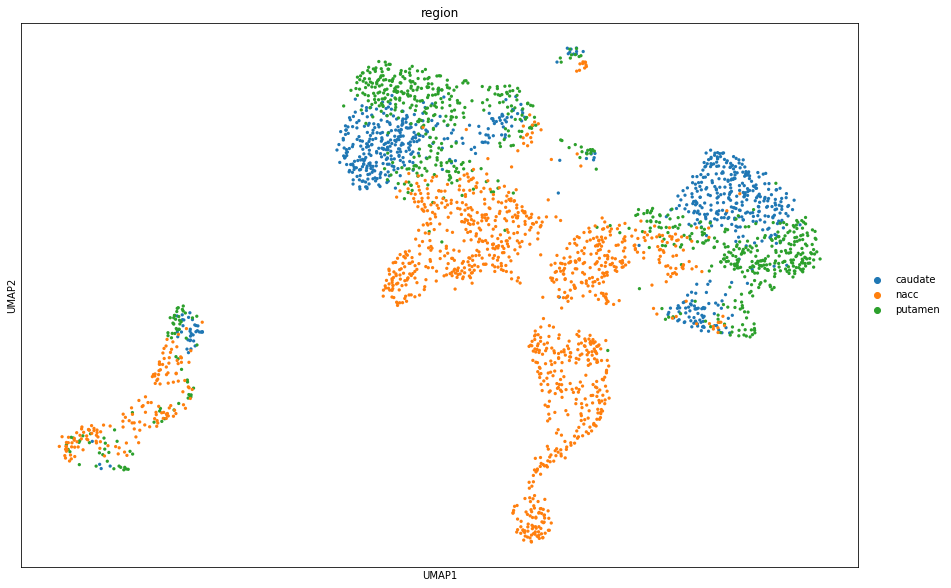

In [321]:
sc.pl.umap(msn_ann,color="region")

In [216]:
import scrublet as scr
scrub = scr.Scrublet(msn_df.loc[msn_ann.obs["leiden"].values=="0",:].values)
doublet_scores, predicted_doublets = scrub.scrub_doublets()


Preprocessing...


/home/mkleyman/anaconda3/lib/python3.7/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/home/mkleyman/anaconda3/lib/python3.7/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.65
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 13.9%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.7%
Elapsed time: 5.1 seconds


(array([9.050e+02, 1.351e+03, 5.460e+02, 3.040e+02, 7.600e+01, 6.600e+01,
        1.900e+01, 1.000e+01, 6.000e+00, 1.000e+00]),
 array([0.   , 0.082, 0.164, 0.246, 0.328, 0.41 , 0.492, 0.574, 0.656,
        0.738, 0.82 ]),
 <a list of 10 Patch objects>)

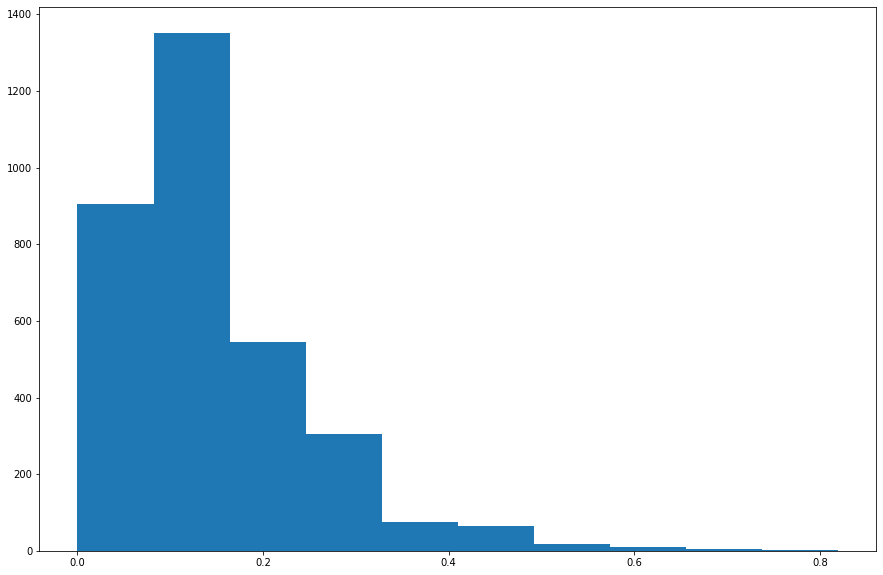

In [223]:
plt.hist(full_doublets_scores)

In [217]:
full_doublets_scores = np.zeros(msn_df.shape[0])

In [220]:
full_doublets_scores[msn_ann.obs["leiden"].values=="0"] = doublet_scores

In [ ]:
msn_ann.obs

In [212]:
sc.tl.leiden(msn_ann,resolution=0.01)

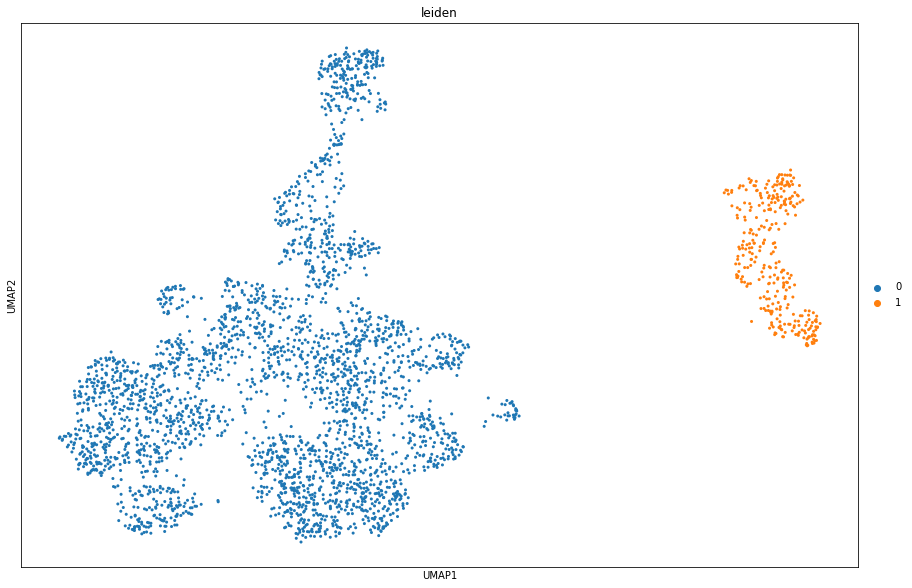

In [213]:
sc.pl.umap(msn_ann,color="leiden")

In [148]:
predicted_doublets.shape

(3284,)

In [57]:
is_D2 = np.asarray([clust in ['0','4'] for clust in msn_ann.obs["leiden"].values])

In [58]:
msn_ann.obs["mark"] = pd.Categorical(
    values=is_D2,
    categories=[True, False])
sc.tl.rank_genes_groups(msn_ann, "mark",method="wilcoxon")
m_genes = [tup[0].lower().capitalize() for tup in msn_ann.uns["rank_genes_groups"]["names"]]
marker_genes = m_genes[:100]

In [64]:
msn_ann.obs["mark"] = pd.Categorical(
    values=is_D2,
    categories=[True, False])
sc.tl.rank_genes_groups(msn_ann, "mark",method="wilcoxon")
m_genes = [tup[1].lower().capitalize() for tup in msn_ann.uns["rank_genes_groups"]["names"]]
marker_genes = m_genes[:100]

In [65]:
marker_genes

['Foxp2',
 'Lingo2',
 'Erbb4',
 'Sorcs1',
 'Dscam',
 'Drd1',
 'Linc01951',
 'Reln',
 'Gdnf-as1',
 'Tac1',
 'Ebf1',
 'Sox1-ot',
 'Tox',
 'Ac106741.1',
 'Prkca',
 'Grik2',
 'Pbx3',
 'Dgkz',
 'Sez6l',
 'Tnr',
 'Cmip',
 'Xylt1',
 'Ppm1e',
 'Dab1',
 'Dchs2',
 'Ptprg',
 'Csmd3',
 'March4',
 'Sema5b',
 'Kcnj3',
 'Myo16',
 'Kcnt2',
 'Nrxn1',
 'Dclk1',
 'Kcnip4',
 'Cntn3',
 'Galntl6',
 'Galnt18',
 'Ubash3b',
 'Fchsd2',
 'Ptprt',
 'Adarb2',
 'Nrg3',
 'Isl1',
 'Tub',
 'Ac020911.2',
 'Tshz1',
 'Sgsm1',
 'Kcnj6',
 'Brinp3',
 'Klhl5',
 'Cnr1',
 'Nkain2',
 'Shank1',
 'Map2',
 'Pdyn',
 'Fbxw7',
 'Eml6',
 'Cux2',
 'Znf804b',
 'Fhod3',
 'Spon1',
 'Ncor2',
 'Rgs6',
 'Ambra1',
 'Hdac9',
 'Prkg1',
 'Kirrel1',
 'Stxbp5-as1',
 'Sgcd',
 'Fgf12',
 'Cemip',
 'Sntg1',
 'Plcb1',
 'Adcy2',
 'Grm7',
 'Carmil1',
 'Shc3',
 'Trpc5',
 'Slco3a1',
 'Khdrbs3',
 'Mef2c',
 'Tiam1',
 'Nhs',
 'Hmgcll1',
 'Cadps',
 'Cadm2',
 'Mvb12b',
 'Gng4',
 'Cep112',
 'Znf521',
 'Ac022433.1',
 'Dock10',
 'Ephb1',
 'Adcy3',
 'Nectin3',
 'Ja

In [68]:
m_pvals = [tup[1] for tup in msn_ann.uns["rank_genes_groups"]["logfoldchanges"]]
m_pvals[:100]

[4.445622,
 2.1093938,
 2.4162247,
 1.4051021,
 2.1046662,
 4.5605693,
 4.7521477,
 3.0460138,
 3.1217203,
 3.5291877,
 3.2921093,
 3.289119,
 2.6816165,
 2.36961,
 1.4831963,
 0.55569744,
 1.1381966,
 1.2212772,
 2.7056632,
 1.4992795,
 1.1276981,
 1.4330921,
 2.154584,
 0.8287267,
 1.5747247,
 0.7469881,
 0.42970085,
 0.95910203,
 3.2171834,
 2.929877,
 2.138157,
 2.5978339,
 0.53914994,
 0.75841516,
 0.52248,
 1.4348286,
 1.4088156,
 0.72939324,
 1.508561,
 1.2541087,
 1.2687633,
 1.6215454,
 0.711698,
 4.4355025,
 1.2435546,
 2.095686,
 1.6105617,
 0.6988292,
 2.5177207,
 0.959466,
 1.4960166,
 1.1734111,
 0.6899359,
 1.4991345,
 0.44736454,
 3.7261724,
 0.61242193,
 0.9236476,
 2.0324788,
 1.6112031,
 1.0153009,
 1.2687756,
 0.69018656,
 1.3170683,
 0.6117033,
 0.97842425,
 0.8853713,
 2.4625208,
 0.82364774,
 0.9202673,
 0.38571823,
 1.2420474,
 0.3348518,
 0.4061747,
 1.6514329,
 0.372911,
 0.63407445,
 1.0080508,
 1.5447285,
 0.7313619,
 1.167556,
 0.8466836,
 0.6509844,
 1.748

In [166]:
drd_both_cels = np.logical_and(msn_df["DRD1"]>0, msn_df["DRD2"]>0)

In [165]:
from sklearn.decomposition import PCA

In [132]:
pca = PCA(n_components=10)

In [133]:
msn_ann.var["highly_variable"].values

array([ True, False, False, ..., False, False, False])

In [190]:
msns_pca = pca.fit_transform(msn_df.loc[:,msn_ann.var["highly_variable"].values])

In [191]:
pca_df = pd.DataFrame(msns_pca, columns=["pca1","pca2","pca3","pca4","pca5","pca6","pca7","pca8","pca9","pca10"])

In [192]:
pca_df["DRD1"] = msn_df["DRD1"].values
pca_df["DRD2"] = msn_df["DRD2"].values
pca_df["TSHZ1"] = msn_df["TSHZ1"].values



/home/mkleyman/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/mkleyman/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


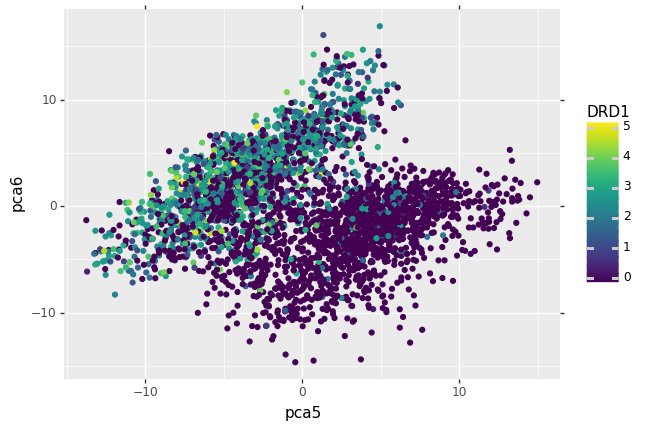

<ggplot: (8597489090382)>

In [193]:
ggplot(pca_df,aes(x="pca5",y="pca6",color="DRD1"))+geom_point()

/home/mkleyman/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/mkleyman/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


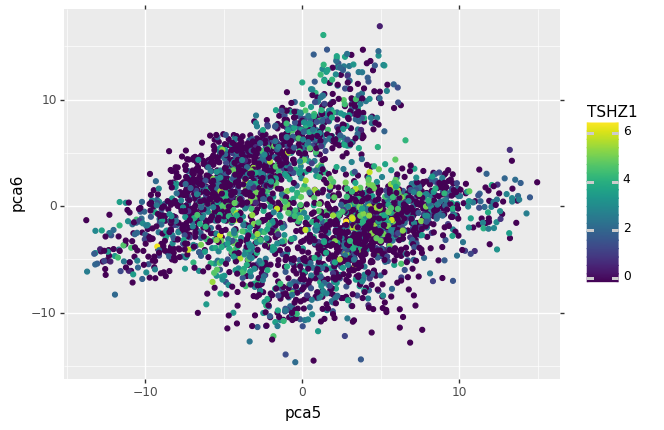

<ggplot: (8597489146260)>

In [194]:
ggplot(pca_df,aes(x="pca5",y="pca6",color="TSHZ1"))+geom_point()

/home/mkleyman/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/mkleyman/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


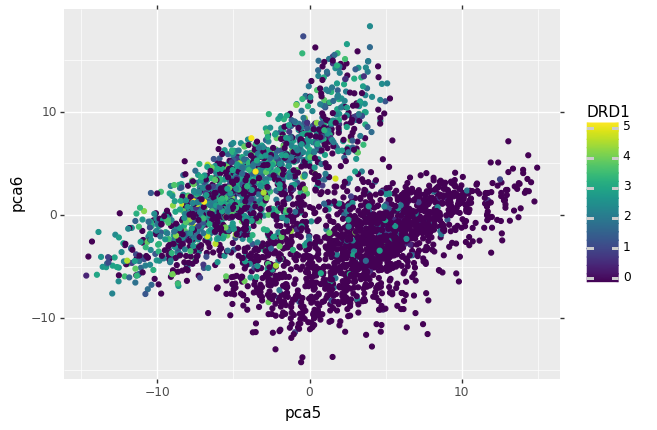

<ggplot: (8597496157125)>

In [143]:
ggplot(pca_df,aes(x="pca5",y="pca6",color="DRD1"))+geom_point()

/home/mkleyman/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/mkleyman/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


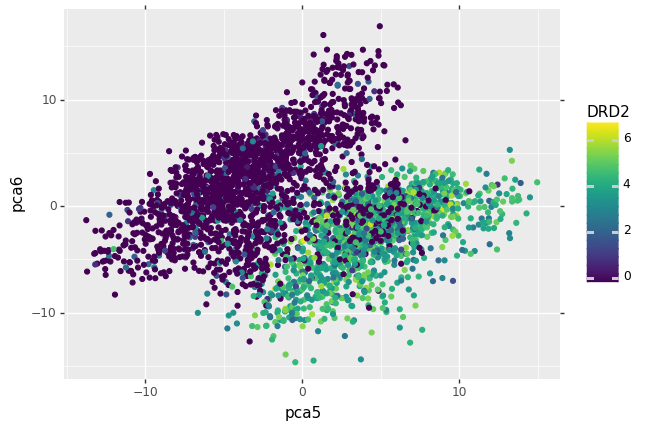

<ggplot: (-9223363439358573189)>

In [195]:
ggplot(pca_df,aes(x="pca5",y="pca6",color="DRD2"))+geom_point()

In [196]:
pc_vals = np.absolute(pca.components_[4,:])+np.absolute(pca.components_[5,:])

In [197]:
thresh=-1*np.sort(-1*pc_vals)[1000]

In [198]:
msn_ann.var["highly_variable"][msn_ann.var["highly_variable"].values==True]= pc_vals>thresh

/home/mkleyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [147]:
sc.tl.umap(msn_ann)

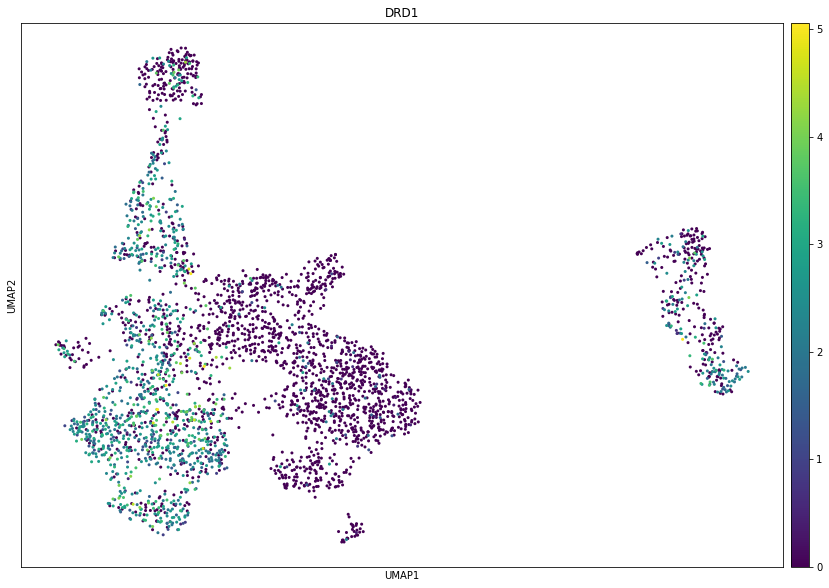

In [148]:
sc.pl.umap(msn_ann,color="DRD1")

In [ ]:
sc.pl.umap(msn_ann,color="DRD2")

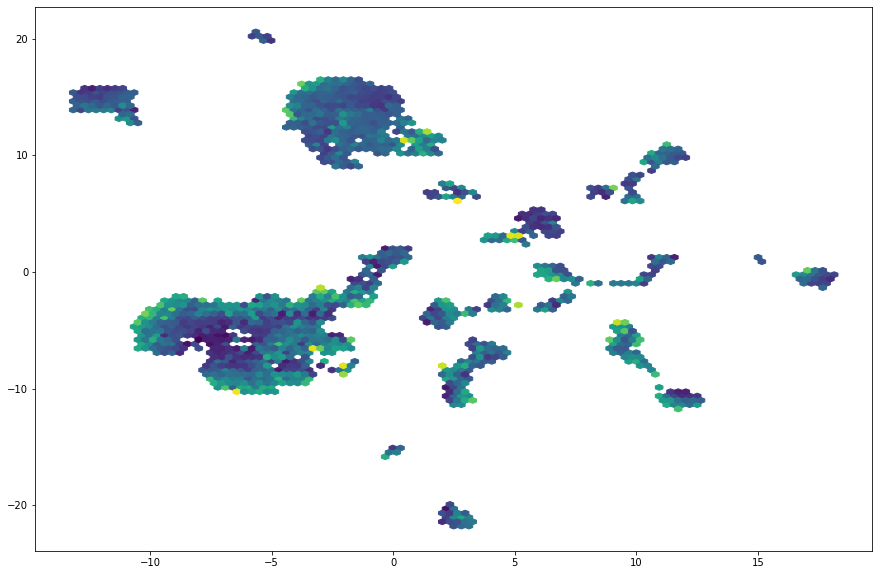

In [55]:
plt.hexbin(x=striatum_ann.obsm["X_umap"][:,0],y=striatum_ann.obsm["X_umap"][:,1],C=annot_df["doublet_score"].values,gridsize=100)

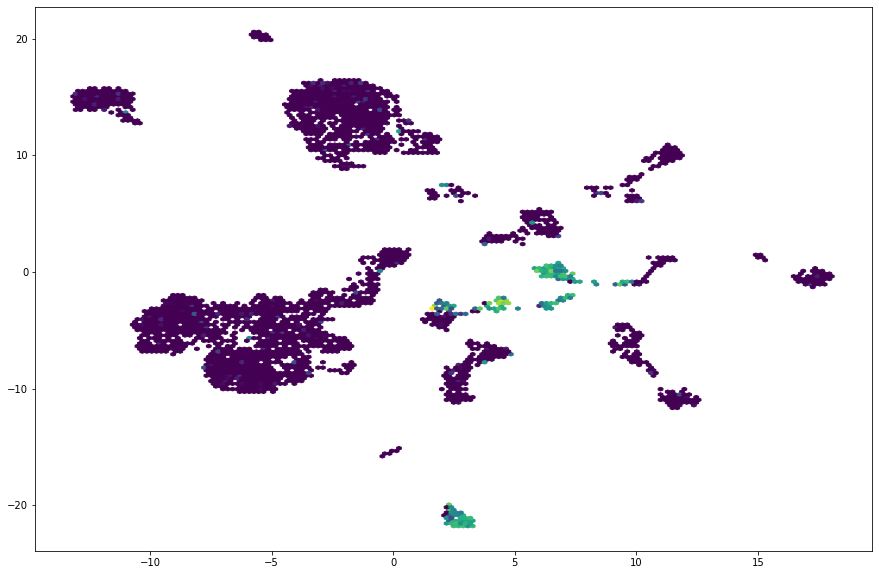

In [56]:
plt.hexbin(x=striatum_ann.obsm["X_umap"][:,0],y=striatum_ann.obsm["X_umap"][:,1],C=striatum_df["LHX6"].values,gridsize=160)

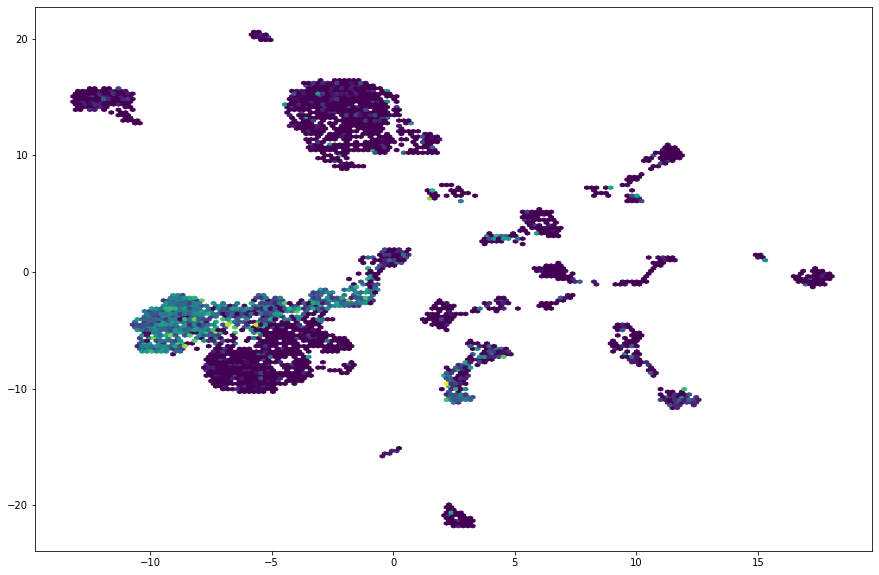

In [200]:
plt.hexbin(x=striatum_ann.obsm["X_umap"][:,0],y=striatum_ann.obsm["X_umap"][:,1],C=striatum_df["DRD1"].values,gridsize=160)

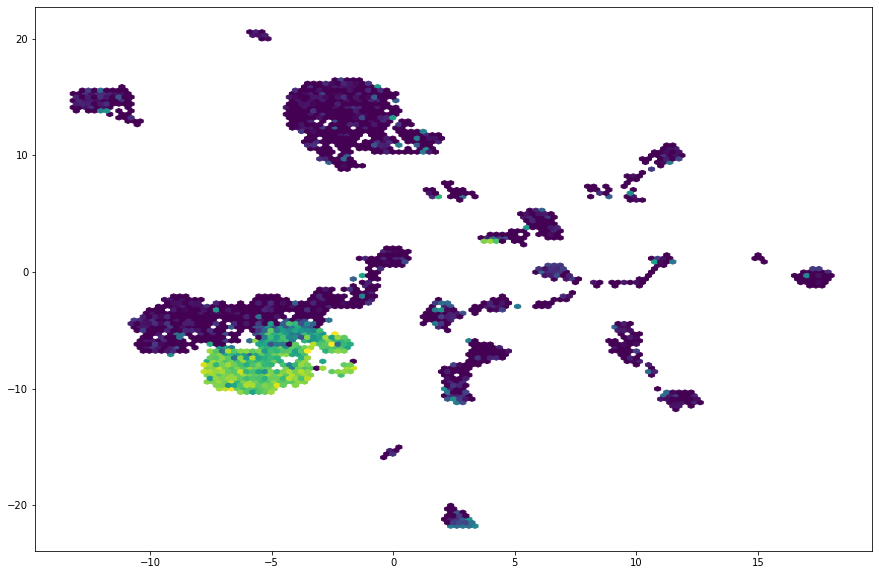

In [197]:
plt.hexbin(x=striatum_ann.obsm["X_umap"][:,0],y=striatum_ann.obsm["X_umap"][:,1],C=striatum_df["DRD2"].values,gridsize=125)

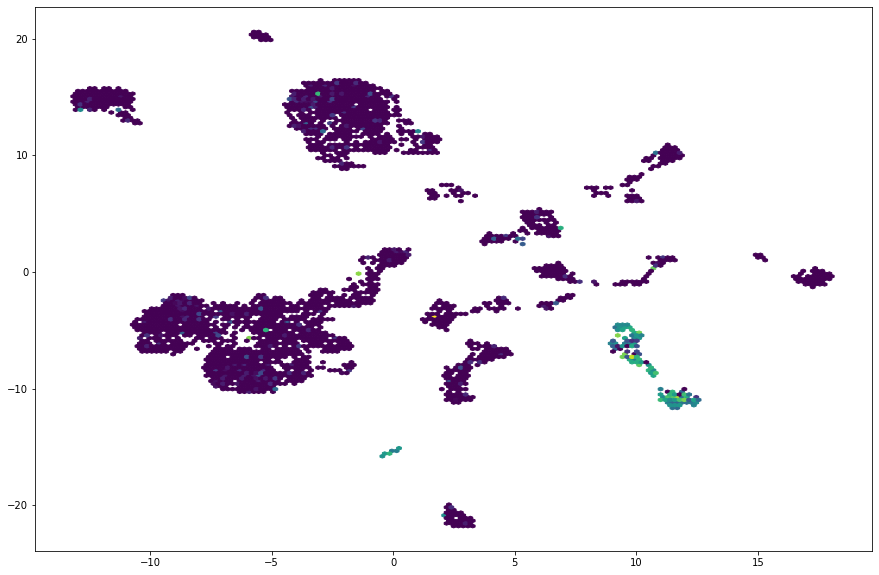

In [205]:
plt.hexbin(x=striatum_ann.obsm["X_umap"][:,0],y=striatum_ann.obsm["X_umap"][:,1],C=striatum_df["SLC17A7"].values,gridsize=160)

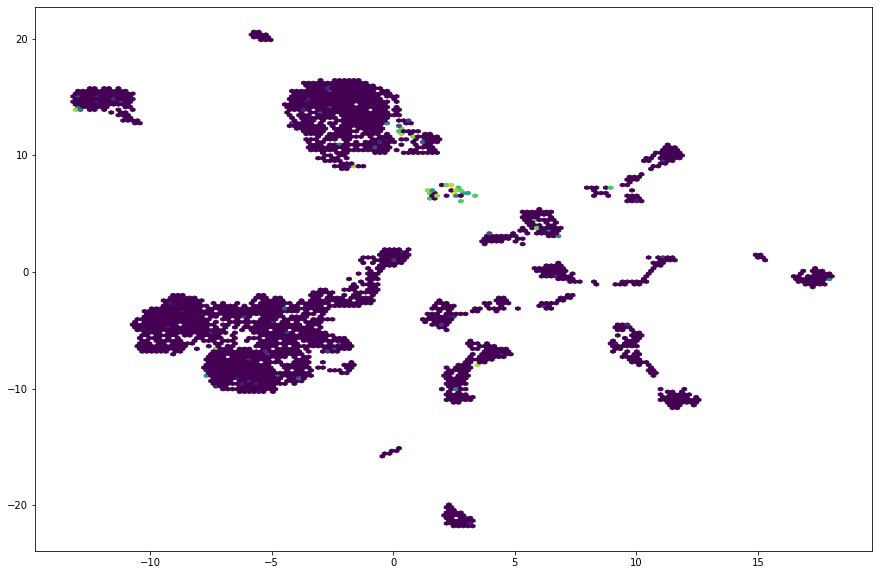

In [206]:
plt.hexbin(x=striatum_ann.obsm["X_umap"][:,0],y=striatum_ann.obsm["X_umap"][:,1],C=striatum_df["CX3CR1"].values,gridsize=160)

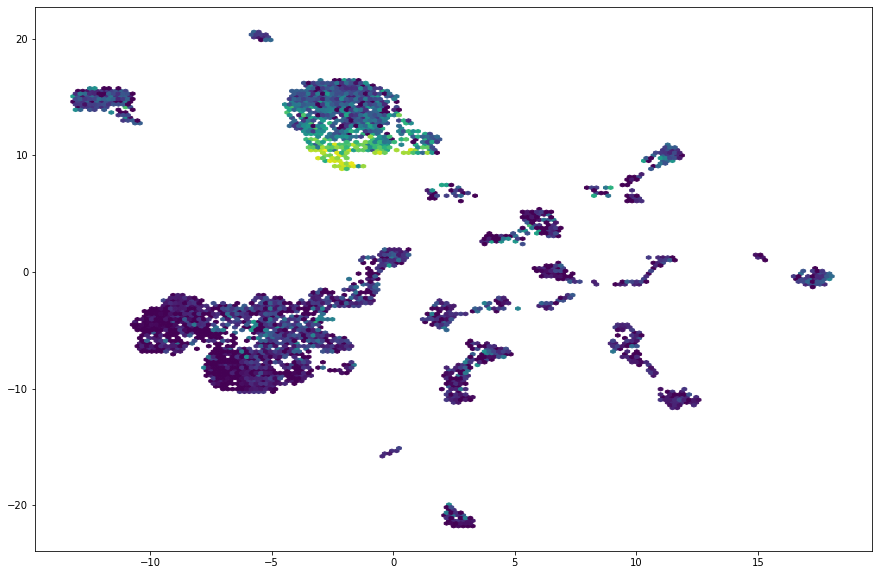

In [207]:
plt.hexbin(x=striatum_ann.obsm["X_umap"][:,0],y=striatum_ann.obsm["X_umap"][:,1],C=striatum_df["GFAP"].values,gridsize=160)

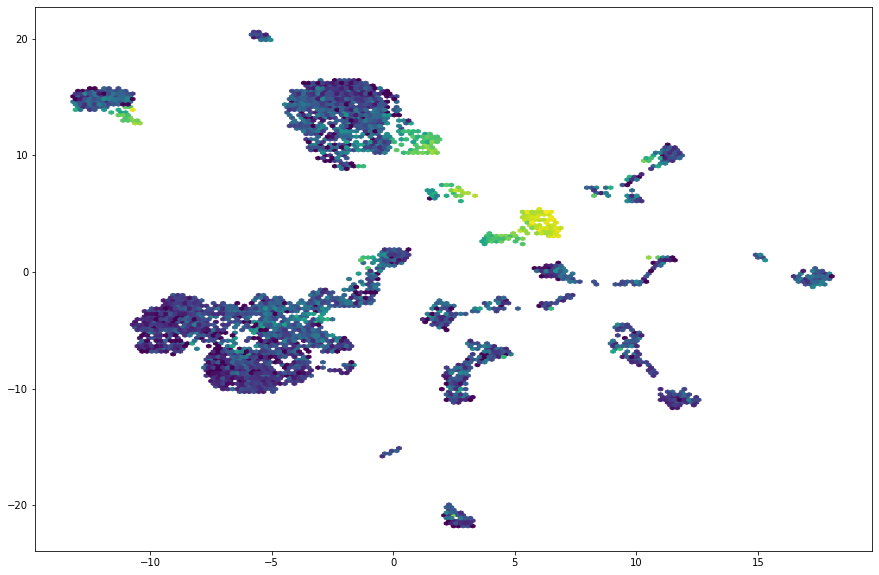

In [208]:
plt.hexbin(x=striatum_ann.obsm["X_umap"][:,0],y=striatum_ann.obsm["X_umap"][:,1],C=striatum_df["MBP"].values,gridsize=160)

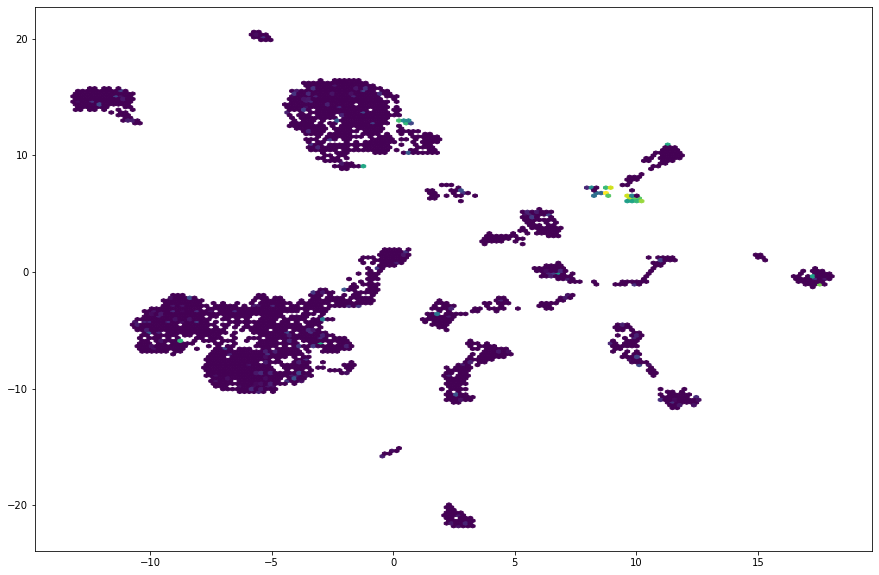

In [209]:
plt.hexbin(x=striatum_ann.obsm["X_umap"][:,0],y=striatum_ann.obsm["X_umap"][:,1],C=striatum_df["CLDN5"].values,gridsize=160)

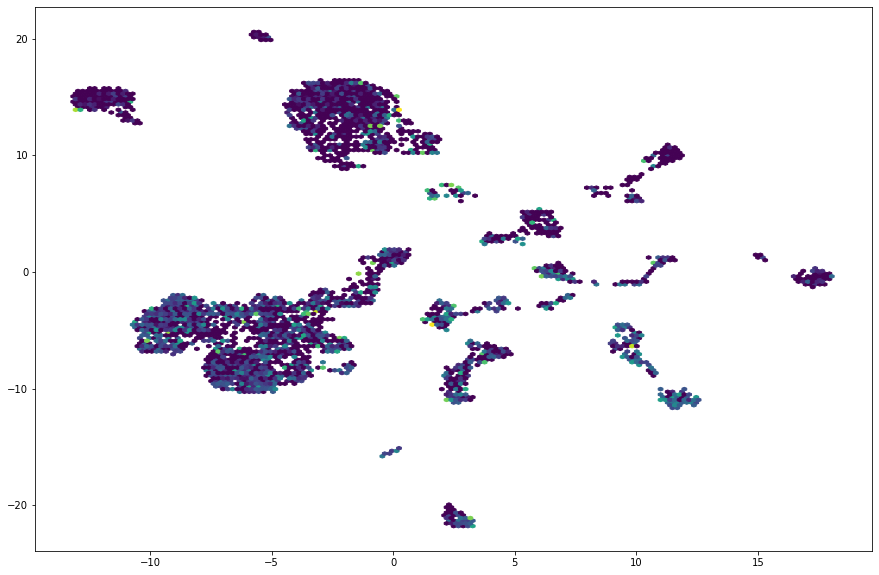

In [210]:
plt.hexbin(x=striatum_ann.obsm["X_umap"][:,0],y=striatum_ann.obsm["X_umap"][:,1],C=striatum_df["CTSS"].values,gridsize=160)

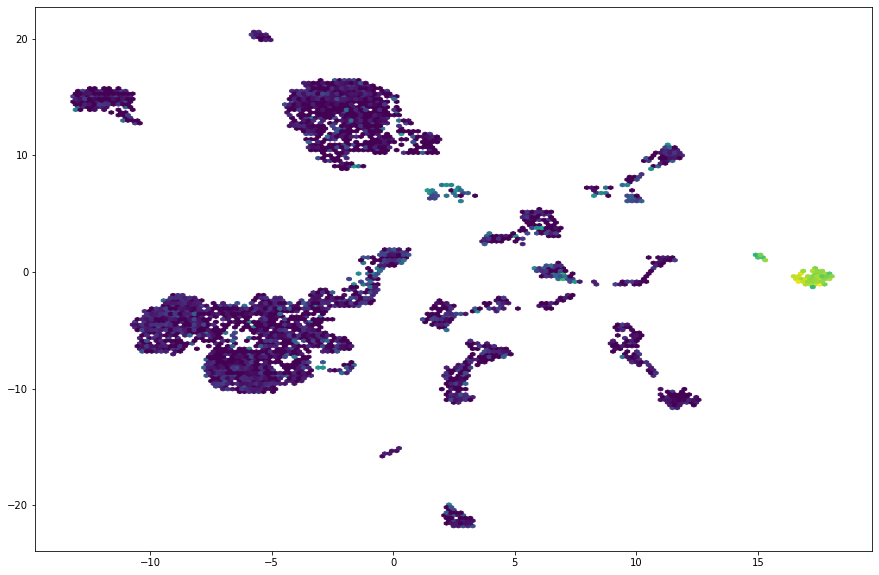

In [211]:
plt.hexbin(x=striatum_ann.obsm["X_umap"][:,0],y=striatum_ann.obsm["X_umap"][:,1],C=striatum_df["THSD4"].values,gridsize=160)

In [223]:
is_mark = striatum_ann.obs["leiden"].values=="3"
striatum_ann.obs["mark"] = pd.Categorical(
    values=is_mark,
    categories=[True, False])
sc.tl.rank_genes_groups(striatum_ann, "mark")
m_genes = [tup[0].lower().capitalize() for tup in striatum_ann.uns["rank_genes_groups"]["names"]]
marker_genes = m_genes[:30]

In [21]:
sc.pl.umap(striatum_ann,color="leiden")

NameError: name 'striatum_ann' is not defined

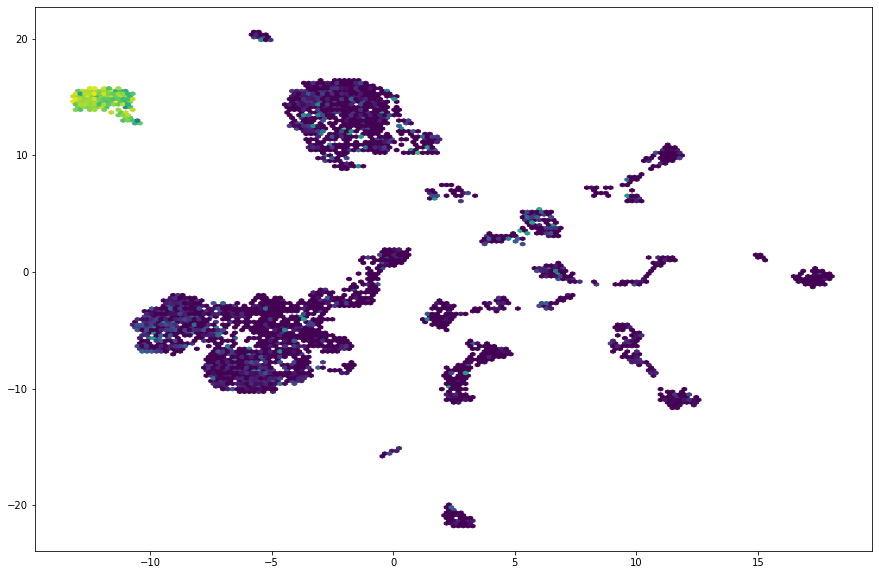

In [226]:
plt.hexbin(x=striatum_ann.obsm["X_umap"][:,0],y=striatum_ann.obsm["X_umap"][:,1],C=striatum_df["COL9A1"].values,gridsize=160)

In [228]:
is_mark = striatum_ann.obs["leiden"].values=="17"
striatum_ann.obs["mark"] = pd.Categorical(
    values=is_mark,
    categories=[True, False])
sc.tl.rank_genes_groups(striatum_ann, "mark")
m_genes = [tup[0].lower().capitalize() for tup in striatum_ann.uns["rank_genes_groups"]["names"]]
marker_genes = m_genes[:30]

In [229]:
is_mark = s_ann.obs["leiden"].values=="3"
striatum_ann.obs["mark"] = pd.Categorical(
    values=is_mark,
    categories=[True, False])
sc.tl.rank_genes_groups(striatum_ann, "mark")
m_genes = [tup[0].lower().capitalize() for tup in striatum_ann.uns["rank_genes_groups"]["names"]]
marker_genes = m_genes[:30]

['Ac097518.2',
 'Dnah11',
 'Dnah12',
 'Ac126121.3',
 'Ofcc1',
 'Zbbx',
 'Cfap100',
 'Dnah10',
 'Drc3',
 'Armc3',
 'Wdr63',
 'Cfap299',
 'Dnah3',
 'Dnah7',
 'Kiaa2012',
 'Spag17',
 'Cfap54',
 'Dthd1',
 'Dnah9',
 'Fhad1',
 'Al357093.2',
 'Ttc29',
 'Ac093865.1',
 'Cfap43',
 'Adgb',
 'Vwa3a',
 'Ccdc60',
 'Lrrc9',
 'Dnah1',
 'Dcdc1']

In [24]:
is_msn

array([False,  True, False, ...,  True,  True,  True])

In [34]:
excitatory_cells = striatum_ann.obs["leiden"].values=="5"

In [327]:
pruned_cells = striatum_df.loc[selected_cells,:]

In [29]:
selected_cells = np.logical_not(is_msn)

In [30]:
selected_cells[is_msn] = ngenes_msn>3400

In [447]:
d1_mark = np.zeros(selected_cells.shape[0]).astype(bool)

In [448]:
d1_mark[is_msn][ngenes_msn>3400][msn_ann.obs["leiden"].values=="1"] = True

In [411]:
d1_mark = d1_mark[selected_cells]

In [412]:
pruned_ann.obs["mark"] = pd.Categorical(
    values=d1_mark,
    categories=[True, False])
sc.tl.rank_genes_groups(pruned_ann, "mark")
d1_genes = [tup[0].lower().capitalize() for tup in pruned_ann.uns["rank_genes_groups"]["names"]]
d1_marker_genes = m_genes[:30]

In [413]:
d1_marker_genes

['Foxp2',
 'Lingo2',
 'Erbb4',
 'Sorcs1',
 'Dscam',
 'Drd1',
 'Linc01951',
 'Reln',
 'Gdnf-as1',
 'Tac1',
 'Ebf1',
 'Sox1-ot',
 'Tox',
 'Ac106741.1',
 'Prkca',
 'Grik2',
 'Pbx3',
 'Dgkz',
 'Sez6l',
 'Tnr',
 'Cmip',
 'Xylt1',
 'Ppm1e',
 'Dab1',
 'Dchs2',
 'Ptprg',
 'Csmd3',
 'March4',
 'Sema5b',
 'Kcnj3']

In [328]:
pruned_annot = annot_df.loc[selected_cells,:]

In [345]:
pruned_ann = AnnData(pruned_cells)

Transforming to str index.


In [346]:
pruned_ann.var_names = pruned_cells.columns.values

In [347]:
pruned_ann.obs["region"] = pd.Categorical(pruned_annot["region"].values,categories=np.unique(pruned_annot["region"].values))

In [365]:
sc.pp.highly_variable_genes(pruned_ann, n_top_genes=9000)

In [366]:
#sc.pp.neighbors(pruned_ann)
sc.pp.pca(pruned_ann, n_comps=50, use_highly_variable=True, svd_solver='arpack')

sc.pp.neighbors(pruned_ann)

In [398]:
sc.tl.umap(pruned_ann,spread=0.75)

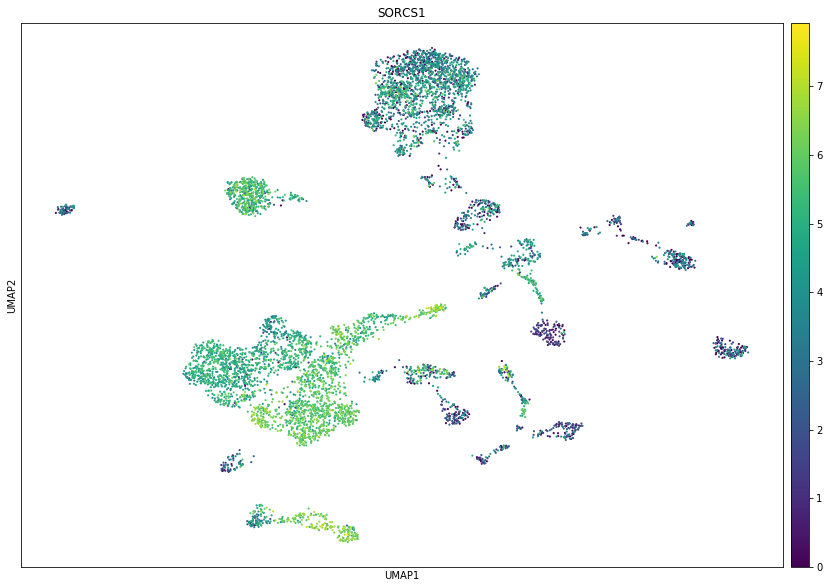

In [416]:
sc.pl.umap(pruned_ann,color="SORCS1")

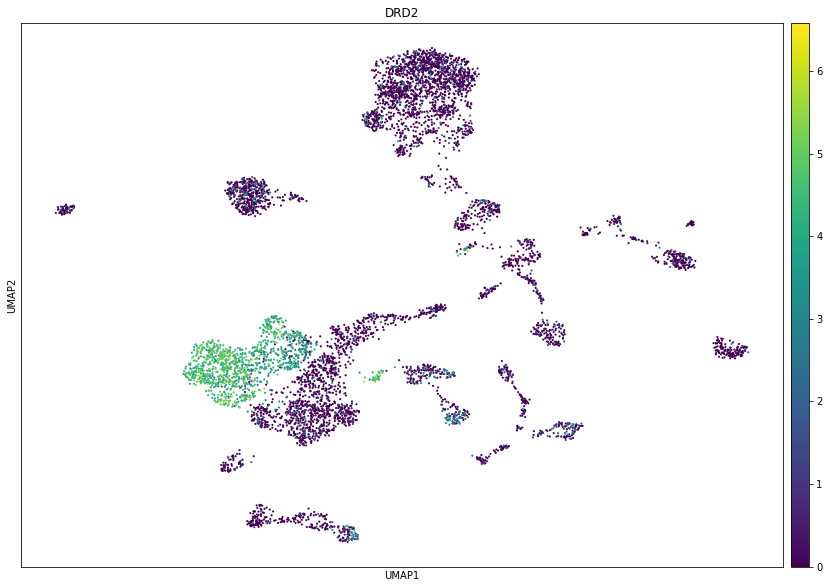

In [400]:
sc.pl.umap(pruned_ann,color="DRD2")

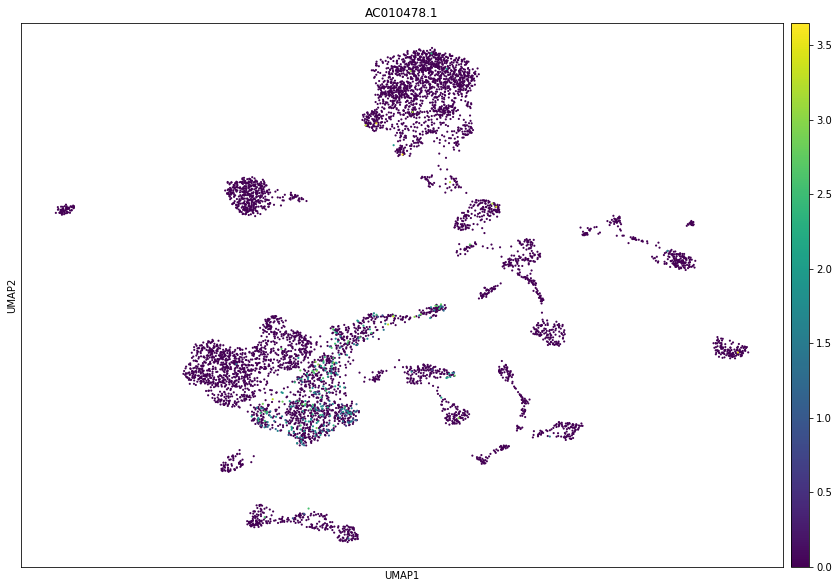

In [509]:
sc.pl.umap(pruned_ann,color="AC010478.1")

In [20]:
sc.pl.umap(pruned_ann,color="leiden")

NameError: name 'pruned_ann' is not defined

In [419]:
pruned_bin =  pruned_cells>0.1

In [477]:
d1_precision = np.nan_to_num(np.sum(pruned_bin.loc[d1_cells,:].values,axis=0)/np.sum(pruned_bin.values,axis=0))

/home/mkleyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/mkleyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [485]:
d1_recall = np.nan_to_num(np.sum(pruned_bin.loc[d1_cells,:].values,axis=0)/(d1_cells.size))

In [486]:
d1_f1 = np.nan_to_num(2*(np.multiply(d1_precision,d1_recall)/(d1_precision+d1_recall)))

/home/mkleyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/mkleyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [487]:
d1_f1_sorted = np.argsort(-1*d1_f1)

In [488]:
d1_gene_rankings = pruned_cells.columns.values[d1_f1_sorted]

In [489]:
d1_gene_rankings[:20]

array(['DRD1', 'LINC01951', 'EBF1', 'TAC1', 'ZNF503-AS2', 'AL033523.1',
       'AC004009.1', 'CCDC78', 'ONECUT2', 'BSPRY', 'DRD3', 'RHAG', 'GRM4',
       'AC107208.1', 'FAM163A', 'CALB1', 'AL020994.2', 'SH3RF2',
       'AL133372.2', 'GPR139'], dtype=object)

In [491]:
d1_precision_series = pd.Series(d1_precision,index=pruned_cells.columns.values)

In [492]:
d1_recall_series = pd.Series(d1_recall,index=pruned_cells.columns.values)

In [494]:
d1_recall_series[d1_gene_rankings[:20]]

DRD1          0.714432
LINC01951     0.712385
EBF1          0.756397
TAC1          0.564995
ZNF503-AS2    0.597748
AL033523.1    0.692938
AC004009.1    0.401228
CCDC78        0.827021
ONECUT2       0.758444
BSPRY         0.662231
DRD3          0.723644
RHAG          0.676561
GRM4          0.780962
AC107208.1    0.705220
FAM163A       0.528147
CALB1         0.583419
AL020994.2    0.831116
SH3RF2        0.946776
AL133372.2    0.868987
GPR139        0.496418
dtype: float64

In [495]:
d1_precision_series[d1_gene_rankings[:20]]

DRD1          0.507636
LINC01951     0.489108
EBF1          0.408965
TAC1          0.441954
ZNF503-AS2    0.406402
AL033523.1    0.370756
AC004009.1    0.594841
CCDC78        0.336947
ONECUT2       0.348542
BSPRY         0.372481
DRD3          0.352267
RHAG          0.362192
GRM4          0.335680
AC107208.1    0.349924
FAM163A       0.418831
CALB1         0.388548
AL020994.2    0.322734
SH3RF2        0.308025
AL133372.2    0.316673
GPR139        0.432264
dtype: float64

In [500]:
d1_dict = {"precision" : d1_precision,"recall":d1_recall,"gene_names":pruned_cells.columns.values}
d1_df = pd.DataFrame(d1_dict)

In [38]:
np.sum(selected_cells)

6570

In [ ]:
stri

/home/mkleyman/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/mkleyman/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_text : Removed 53566 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/mkleyman/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


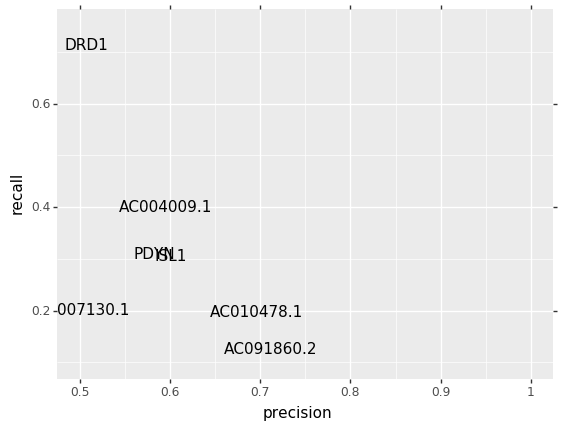

<ggplot: (8596873689173)>

In [507]:
ggplot(d1_df,aes(x="precision",y="recall",label="gene_names"))+xlim(.5,1)+ylim(0.1,.75)+geom_text()

In [502]:
from plotnine import geom_text,xlim,ylim

In [445]:
np.sum(np.sum(pruned_bin.loc[d1_mark,:].values,axis=0))

0

In [464]:
np.sum(np.nan_to_num(d1_precision))

6625.609513936072

In [454]:
d1_mark[is_msn][ngenes_msn>3400][msn_ann.obs["leiden"].values=="1"]

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [455]:
d1_mark[is_msn][ngenes_msn>3400][msn_ann.obs["leiden"].values=="1"] 

(2800,)

In [458]:
d1_cells = annot_df["full_id"][is_msn][ngenes_msn>3400][msn_ann.obs["leiden"].values=="1"].values

In [460]:
pruned_cells.index = pruned_annot["full_id"].values

In [461]:
pruned_bin = pruned_cells>0.1

In [510]:
AnnData.write(pruned_ann,"/pylon5/mc5pijp/mkleyman/data/fiona_rhemac10/processed/full/pruned_ann.h5ad")
AnnData.write(msn_ann,"/pylon5/mc5pijp/mkleyman/data/fiona_rhemac10/processed/full/msn_ann.h5ad")
AnnData.write(striatum_ann,"/pylon5/mc5pijp/mkleyman/data/fiona_rhemac10/processed/full/striatum_ann.h5ad")

In [ ]:
feather.write_dataframe(pruned_a)

In [40]:
annot_df[selected_cells].to_csv("selected_annot.csv")